# Introduction


*A feedforward neural network is a type of artificial neural network where the connections between units do not form cycles. This means that information moves in a single direction, forward, from the input, through the hidden layers (if any), and up to the output layer. This type of neural network is one of the simplest and serves as a foundation for understanding more complex concepts in the realm of neural networks.*

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We will work with the obesity classification dataset.

In [ ]:
#Load Data and review content
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(f'df shape:{df.shape}')


df shape:(2111, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df1 = df.copy()

## EDA

In [ ]:
df1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


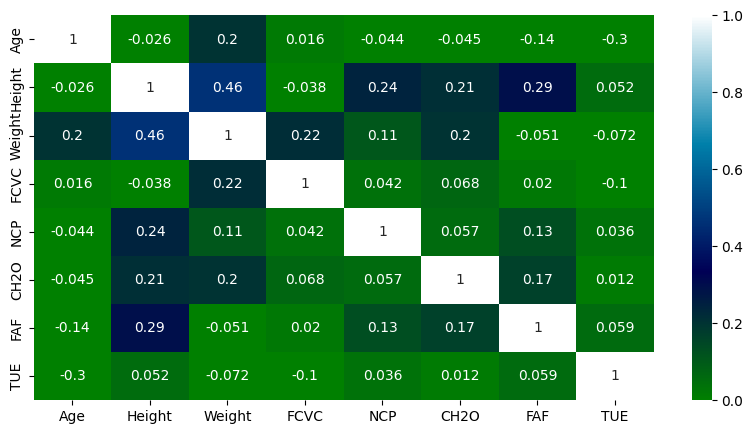

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_cols = df1.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, cmap='ocean')
plt.show()

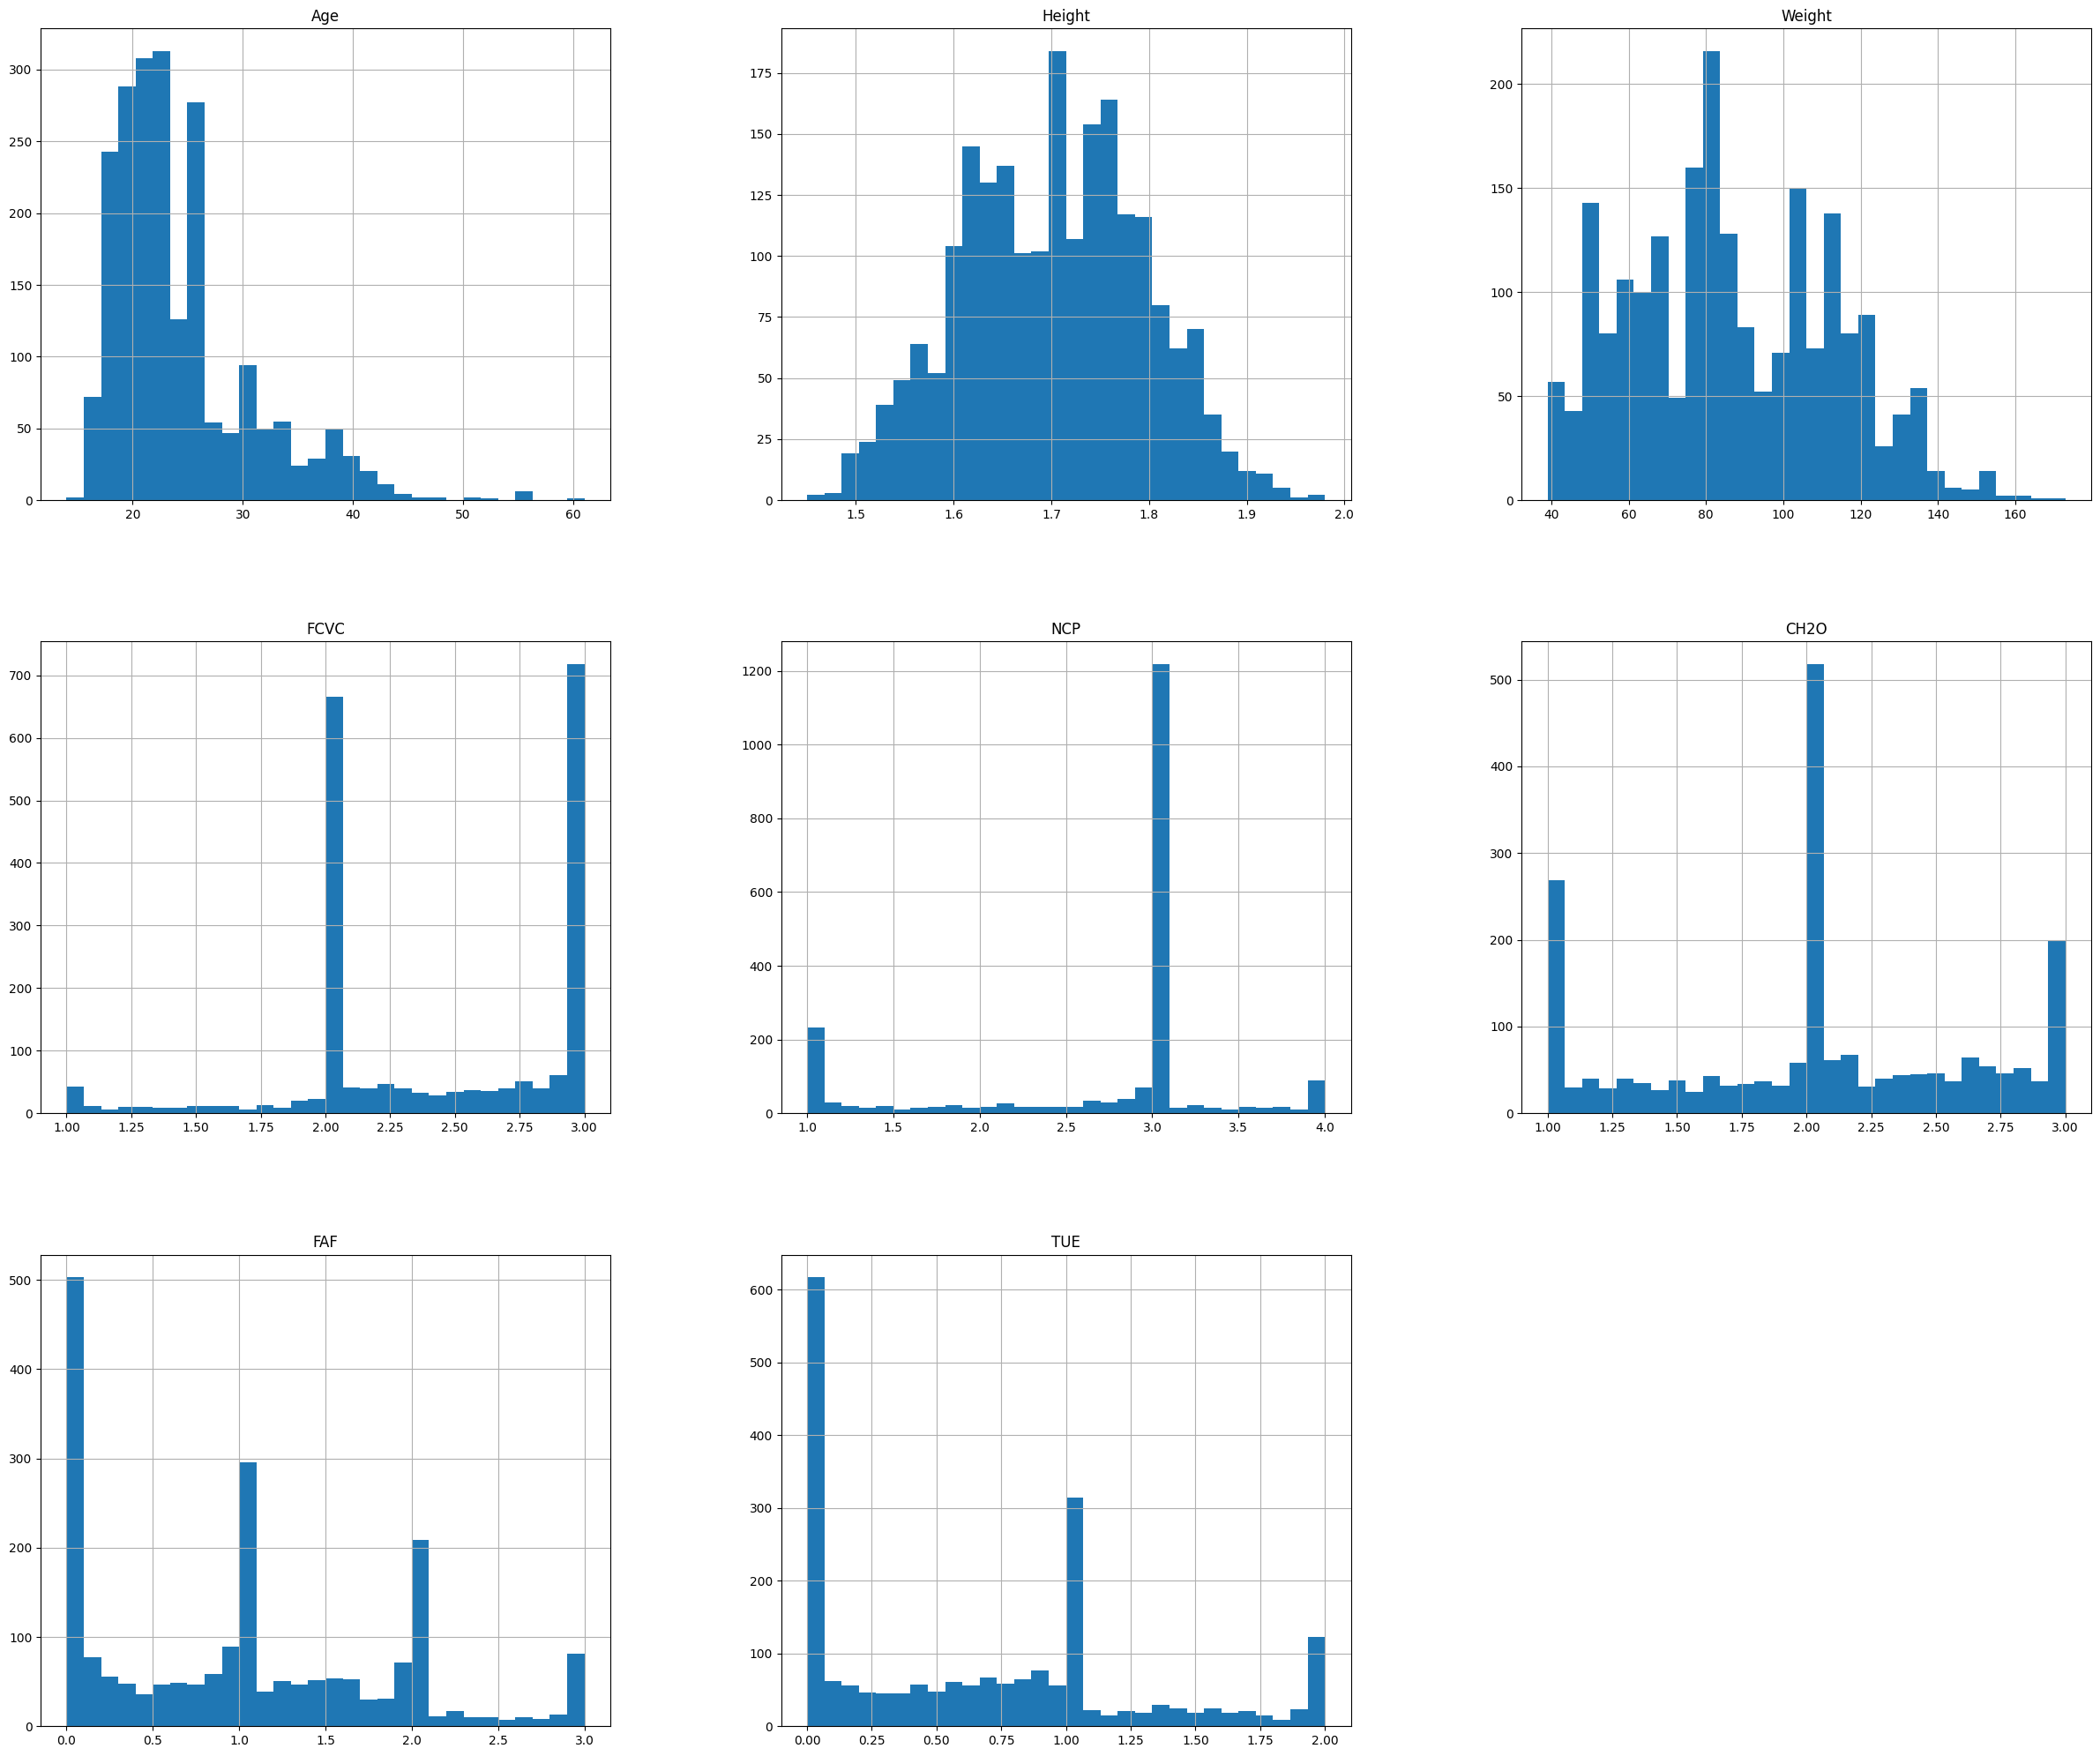

In [ ]:
df1.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

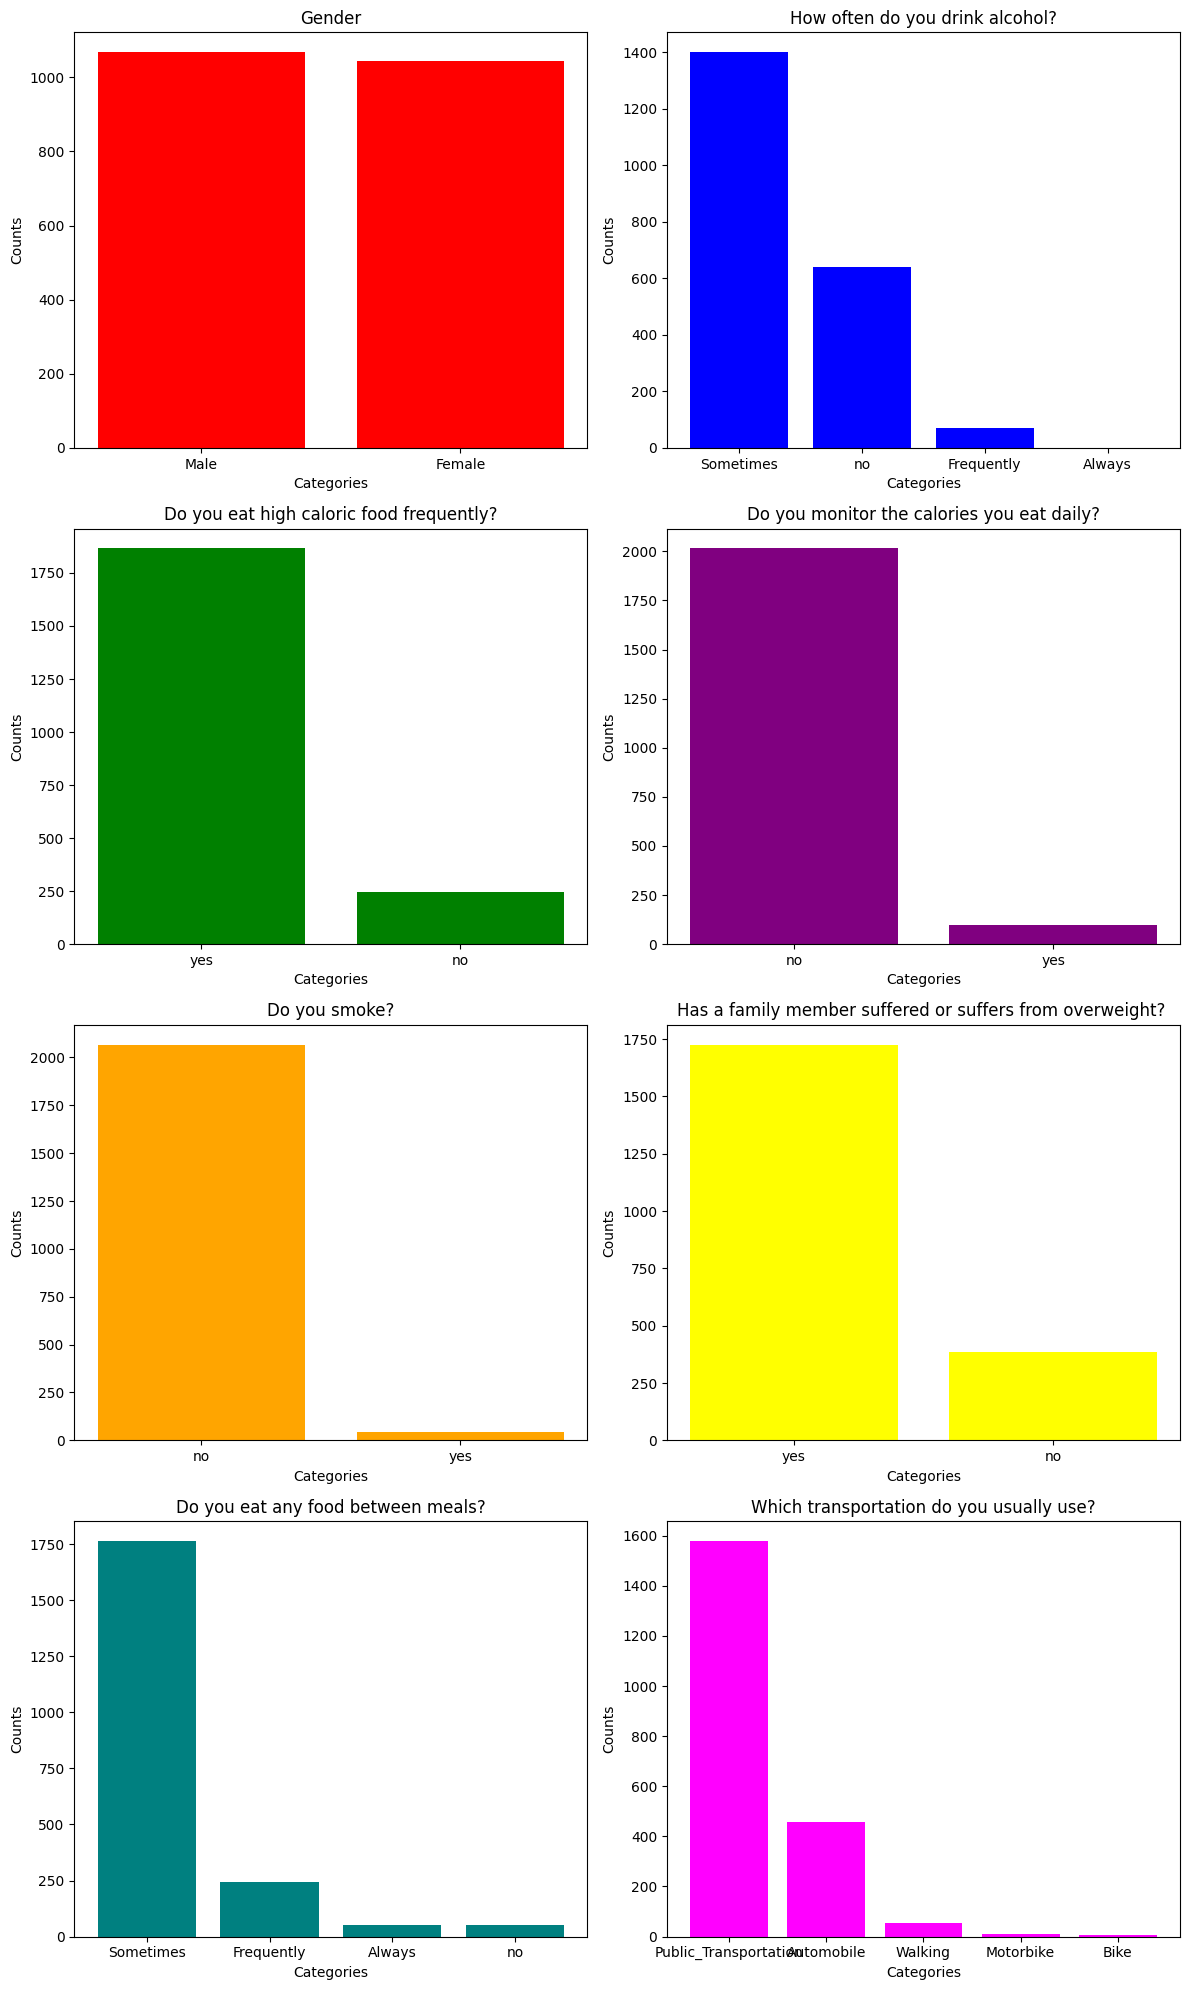

In [ ]:
columns_for_barplot = df1[['Gender', 'CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS']]

# Assuming df1 is your DataFrame
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

# Plot each variable in a different subplot
axs[0, 0].bar(df1['Gender'].value_counts().index, df1['Gender'].value_counts().values, color='red')
axs[0, 0].set_title('Gender')
axs[0, 0].set_xlabel('Categories')
axs[0, 0].set_ylabel('Counts')

axs[0, 1].bar(df1['CALC'].value_counts().index, df1['CALC'].value_counts().values, color='blue')
axs[0, 1].set_title('How often do you drink alcohol?')
axs[0, 1].set_xlabel('Categories')
axs[0, 1].set_ylabel('Counts')

axs[1, 0].bar(df1['FAVC'].value_counts().index, df1['FAVC'].value_counts().values, color='green')
axs[1, 0].set_title('Do you eat high caloric food frequently?')
axs[1, 0].set_xlabel('Categories')
axs[1, 0].set_ylabel('Counts')

axs[1, 1].bar(df1['SCC'].value_counts().index, df1['SCC'].value_counts().values, color='purple')
axs[1, 1].set_title('Do you monitor the calories you eat daily?')
axs[1, 1].set_xlabel('Categories')
axs[1, 1].set_ylabel('Counts')

axs[2, 0].bar(df1['SMOKE'].value_counts().index, df1['SMOKE'].value_counts().values, color='orange')
axs[2, 0].set_title('Do you smoke?')
axs[2, 0].set_xlabel('Categories')
axs[2, 0].set_ylabel('Counts')

axs[2, 1].bar(df1['family_history_with_overweight'].value_counts().index, df1['family_history_with_overweight'].value_counts().values, color='yellow')
axs[2, 1].set_title('Has a family member suffered or suffers from overweight? ')
axs[2, 1].set_xlabel('Categories')
axs[2, 1].set_ylabel('Counts')

axs[3, 0].bar(df1['CAEC'].value_counts().index, df1['CAEC'].value_counts().values, color='teal')
axs[3, 0].set_title('Do you eat any food between meals?')
axs[3, 0].set_xlabel('Categories')
axs[3, 0].set_ylabel('Counts')

axs[3, 1].bar(df1['MTRANS'].value_counts().index, df1['MTRANS'].value_counts().values, color='magenta')
axs[3, 1].set_title('Which transportation do you usually use?')
axs[3, 1].set_xlabel('Categories')
axs[3, 1].set_ylabel('Counts')

fig.tight_layout()
plt.show()


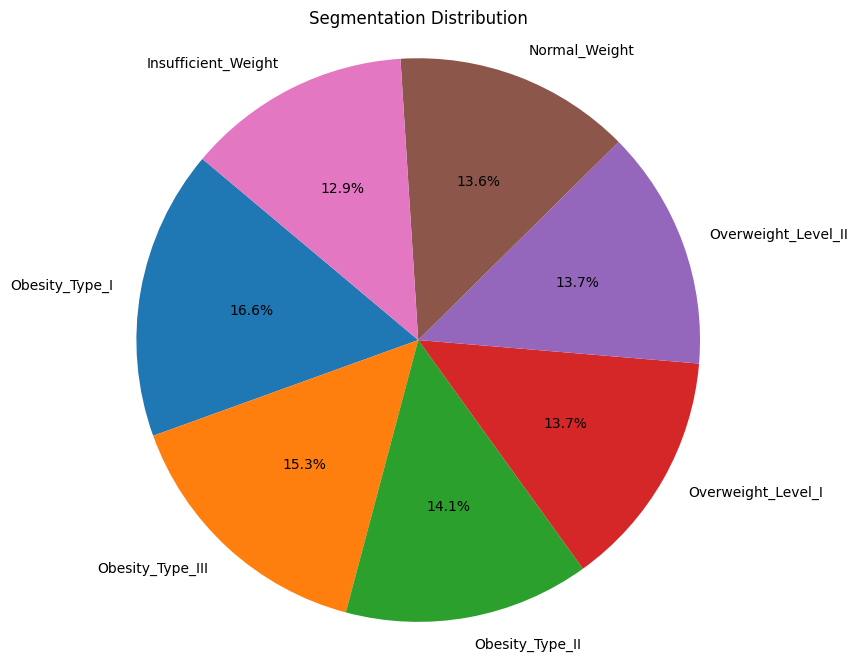

In [ ]:
segment_counts = df1['NObeyesdad'].value_counts()

# Extract labels and values for the pie chart
labels = segment_counts.index
sizes = segment_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Segmentation Distribution')
plt.show()

In [ ]:
numeric_cols

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


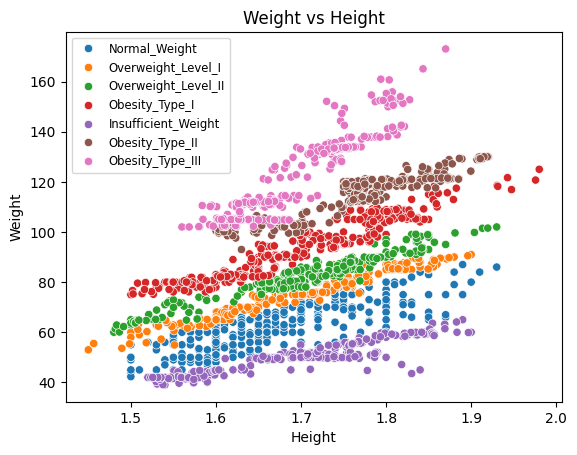

In [ ]:
sns.scatterplot(df1, x="Height", y="Weight", hue = "NObeyesdad")
plt.title("Weight vs Height")
plt.legend(loc='best', fontsize='small')
plt.show()

# Standarization

In [ ]:

# Selecciona las columnas numéricas que deseas estandarizar
numeric_cols = ['Age', 'Height','Weight','Weight','FCVC','NCP','CH2O','FAF','TUE']

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a los datos y transforma solo las columnas seleccionadas
df1_scaled = df1.copy()  # Crea una copia del DataFrame original

# Estandariza las columnas numéricas seleccionadas
df1_scaled[numeric_cols] = scaler.fit_transform(df1_scaled[numeric_cols])



Transforming data to numeric values

In [ ]:
#Use a Label encoder to convert String to numeric values
#for the target variable

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df1_scaled['NObeyesdad'] = label_encoder.fit_transform(
                                df1_scaled['NObeyesdad'])

In [ ]:
df1_scaled['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [ ]:
#label encoder for binary features
df1_scaled['Gender'] = label_encoder.fit_transform(df1_scaled['Gender'])
df1_scaled['FAVC']= label_encoder.fit_transform(df1_scaled['FAVC'])
df1_scaled['SCC']= label_encoder.fit_transform(df1_scaled['SCC'])
df1_scaled['SMOKE']= label_encoder.fit_transform(df1_scaled['SMOKE'])
df1_scaled['family_history_with_overweight']= label_encoder.fit_transform(df1_scaled['family_history_with_overweight'])

In [ ]:
df1_scaled['CAEC'] = df1_scaled['CAEC'].replace({'no':0,'Always':1,'Sometimes':2, 'Frequently':3})
df1_scaled['CALC'] = df1_scaled['CALC'].replace({'no':0,'Always':1,'Sometimes':2, 'Frequently':3})

In [ ]:
df1_scaled = pd.get_dummies(df1_scaled, columns=['MTRANS'], prefix=['Transp'], dtype=int)

In [ ]:
df1_scaled

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,Transp_Automobile,Transp_Bike,Transp_Motorbike,Transp_Public_Transportation,Transp_Walking
0,-0.522124,0,-0.875589,-0.862558,0,0,-0.785019,0.404153,0,0,...,1,-1.188039,0.561997,2,1,0,0,0,1,0
1,-0.522124,0,-1.947599,-1.168077,2,0,1.088342,0.404153,1,1,...,1,2.339750,-1.080625,2,1,0,0,0,1,0
2,-0.206889,1,1.054029,-0.366090,3,0,-0.785019,0.404153,0,0,...,1,1.163820,0.561997,2,1,0,0,0,1,0
3,0.423582,1,1.054029,0.015808,3,0,1.088342,0.404153,0,0,...,0,1.163820,-1.080625,2,5,0,0,0,0,1
4,-0.364507,1,0.839627,0.122740,2,0,-0.785019,-2.167023,0,0,...,0,-1.188039,-1.080625,2,6,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0,0.097045,1.711763,2,1,1.088342,0.404153,0,0,...,1,0.783135,0.407996,2,4,0,0,0,1,0
2107,-0.367195,0,0.502844,1.800914,2,1,1.088342,0.404153,0,0,...,1,0.389341,-0.096251,2,4,0,0,0,1,0
2108,-0.281909,0,0.541672,1.798868,2,1,1.088342,0.404153,0,0,...,1,0.474971,-0.019018,2,4,0,0,0,1,0
2109,0.007776,0,0.404927,1.785780,2,1,1.088342,0.404153,0,0,...,1,0.151471,-0.117991,2,4,0,0,0,1,0


# Feature selection

In [ ]:
X = df1_scaled.drop(columns=['NObeyesdad'])
y = df1_scaled['NObeyesdad']

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

# Crear un modelo base
modelo_base = KNeighborsClassifier()

# Crear un selector SFS
selector = SequentialFeatureSelector(estimator=modelo_base, n_features_to_select=4, direction='forward')

# Aplicar el selector SFS al conjunto de datos
selector = selector.fit(X, y)

# Características seleccionadas
caracteristicas_seleccionadas = X.columns[selector.get_support(indices=True)]
print("Características seleccionadas:", caracteristicas_seleccionadas)

Características seleccionadas: Index(['Gender', 'Height', 'Weight', 'Transp_Bike'], dtype='object')


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier



# Crear un modelo base
modelo_base = DecisionTreeClassifier()

# Crear un selector RFE
selector = RFE(estimator=modelo_base, n_features_to_select=4, step=1)

# Aplicar el selector RFE al conjunto de datos
selector = selector.fit(X, y)

# Características seleccionadas
caracteristicas_seleccionadas = X.columns[selector.support_]

# Características eliminadas
caracteristicas_eliminadas = X.columns[~selector.support_]

print("Características seleccionadas:", caracteristicas_seleccionadas)
print("Características eliminadas:", caracteristicas_eliminadas)

Características seleccionadas: Index(['Age', 'Gender', 'Height', 'Weight'], dtype='object')
Características eliminadas: Index(['CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O',
       'family_history_with_overweight', 'FAF', 'TUE', 'CAEC',
       'Transp_Automobile', 'Transp_Bike', 'Transp_Motorbike',
       'Transp_Public_Transportation', 'Transp_Walking'],
      dtype='object')


Data transformation

In [ ]:
dfLOF["sellingprice"] = np.log1p(dfLOF["sellingprice"])

# Split data

In [ ]:
# # # #Separate feature and target variables
# X = df1_scaled.drop(columns=['NObeyesdad'])
# y = df1_scaled['NObeyesdad']

X = df1_scaled[['Age', 'Gender', 'Height', 'Weight']]
y = df1_scaled['NObeyesdad']


In [ ]:
#Convert input to numpy array
X_np = X.to_numpy()
y_np = y.to_numpy()

In [ ]:
print(f'X shape:{X_np.shape}')
print(f'y shape:{y_np.shape}')

X shape:(2111, 4)
y shape:(2111,)


In [ ]:
#Convert target variable as a one-hot-encoding array
y_np = tf.keras.utils.to_categorical(y_np,7)


In [ ]:
y_np.shape

(2111, 7)

In [ ]:
#Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split( X_np, y_np, test_size=0.10)

In [ ]:
print(f'cantidad de características: {len(X_np[1])}')
print(f'número de clases de la variable target: {len(y_np[1])}')

cantidad de características: 4
número de clases de la variable target: 7


# Model

In [ ]:
from tensorflow import keras

NB_FEATURES = len(X_np[1])
NB_CLASSES = len(y_np[1])

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(NB_FEATURES,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))   #activation function

model.add(keras.layers.Dropout(0.2))

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dropout(0.2))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 Output-Layer (Dense)        (None, 7)                 903       
                                                                 
Total params: 18055 (70.53 KB)
Trainable params: 18055 (70.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and Evaluation

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=.005)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'], )

#  Fit the Model
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                    epochs = 200, batch_size=32)

Epoch 1/200
60/60 [==============================] - 2s 7ms/step - loss: 0.9150 - accuracy: 0.6361 - val_loss: 0.3889 - val_accuracy: 0.8726
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8194 - val_loss: 0.2954 - val_accuracy: 0.8679
Epoch 3/200
60/60 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8710 - val_loss: 0.1671 - val_accuracy: 0.9623
Epoch 4/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8947 - val_loss: 0.1640 - val_accuracy: 0.9387
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.9031 - val_loss: 0.1433 - val_accuracy: 0.9481
Epoch 6/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9173 - val_loss: 0.1413 - val_accuracy: 0.9528
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2227 - accuracy: 0.9189 - val_loss: 0.1163 - val_accuracy: 0.9528
Epoch 8/200
6

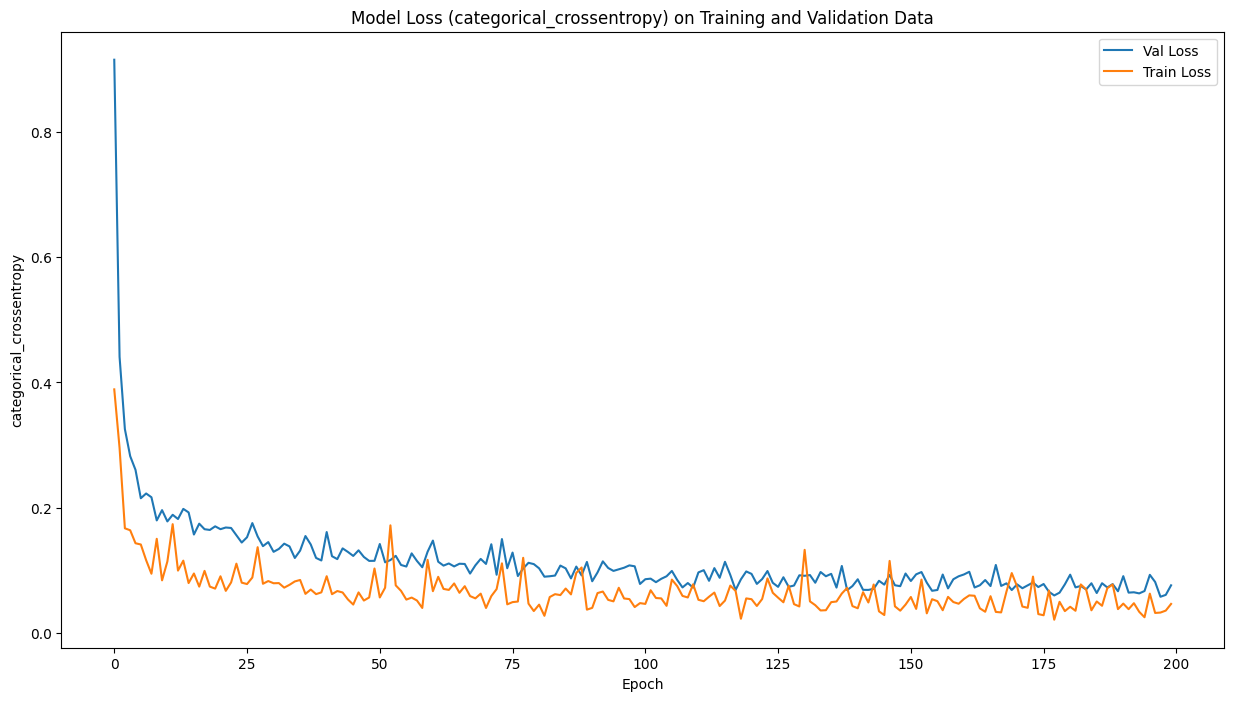

In [ ]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (categorical_crossentropy) on Training and Validation Data')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

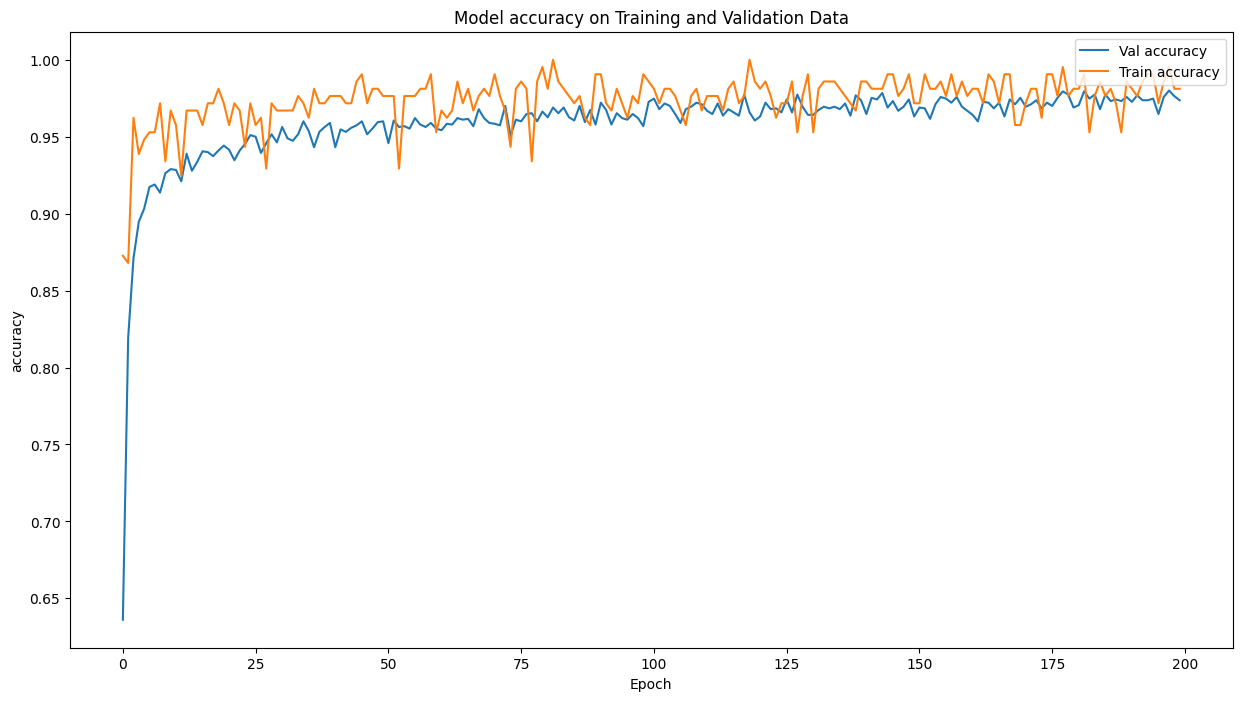

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy on Training and Validation Data')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Val accuracy', 'Train accuracy'], loc='upper right')
plt.show()

# Prediction and metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
test_predictions = model.predict(X_test)

# Revertir la transformación dummies en Y_test
Y_test_reverse = np.argmax(Y_test, axis=1)

# Revertir la transformación dummies en test_predictions
test_predictions_reverse = np.argmax(test_predictions, axis=1)

accuracy = accuracy_score(Y_test_reverse, test_predictions_reverse)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step
Accuracy: 0.9811320754716981


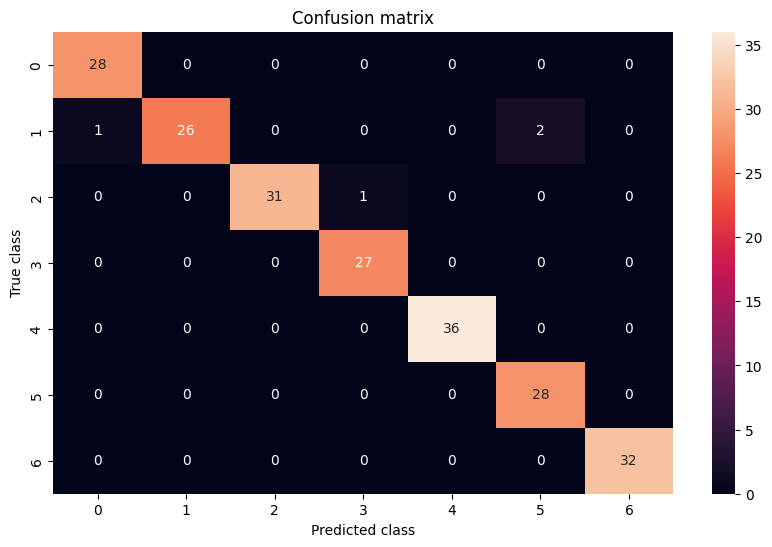

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.90      0.95        29
           2       1.00      0.97      0.98        32
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00        36
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        32

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



In [ ]:


# medimos los resultados en una matriz de confusión
def mostrar_resultados(y_test, pred_y):
  conf_matrix = confusion_matrix(y_test, pred_y)
  plt.figure(figsize=(10, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()
  print (classification_report(y_test, pred_y))

mostrar_resultados(Y_test_reverse, test_predictions_reverse)